In [9]:
import pandas as pd
import glob
import os
import tqdm
import gc
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from tqdm import tqdm
from sklearn.metrics import classification_report
##Для отображения плотов на лету
%matplotlib inline

In [20]:
# Задание 1 - креативная часть и техническая (насчет второй сомневаюсь)

def data_class(alldata, allinput, alloutput):
    chunk_80 = int(len(alldata) * 0.8)

    X_train = allinput[ :chunk_80]
    Y_train = alloutput[ :chunk_80]

    X_test = allinput[chunk_80: ]
    Y_test = alloutput[chunk_80: ]

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.2)
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)

    Y_test_predicted = model.predict(X_test)

    mysex=model.predict([[myAge, myW, myH, myKoef]])

    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    confusion_matrix(Y_test, Y_test_predicted)

    precision = tp / (tp + fp)
    recall = tp / tp + fn

    print("Precision: ", tp / (tp + fp))
    print("Recall: ", tp / (tp + fn))
    print("Accuracy: ", (tn + tp) / (tp + fp + tn + fn))
    print("F1: ",  (precision * recall) / ((precision) + recall))

    report = classification_report(Y_test, model.predict(X_test), target_names=['Male', 'Female'])
    print(report)
    

f='../ExternalFiles/csv/athletes_sochi.txt'
dfs = pd.read_csv(f).dropna()

dfs["age_BMI"] = dfs["age"] / (dfs["weight"] / (dfs["height"]**2))
myAge=21
myW=70
myH=1.86 
myKoef=myAge / (myW/(myH**2))
alldata = dfs[ ['age', 'weight', 'height', 'age_BMI', 'gender'] ]
alldata = alldata.sample(frac=1)
allinput = alldata[ ['age', 'weight', 'height', 'age_BMI'] ]
alloutput = alldata["gender"].apply(lambda x: int(x == "Male"))


Precision:  0.8925081433224755
Recall:  0.9042904290429042
Accuracy:  0.875
F1:  0.8667229017292282
              precision    recall  f1-score   support

        Male       0.85      0.83      0.84       193
      Female       0.89      0.90      0.90       303

    accuracy                           0.88       496
   macro avg       0.87      0.87      0.87       496
weighted avg       0.87      0.88      0.87       496



/home/girder/jupyter/environment/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


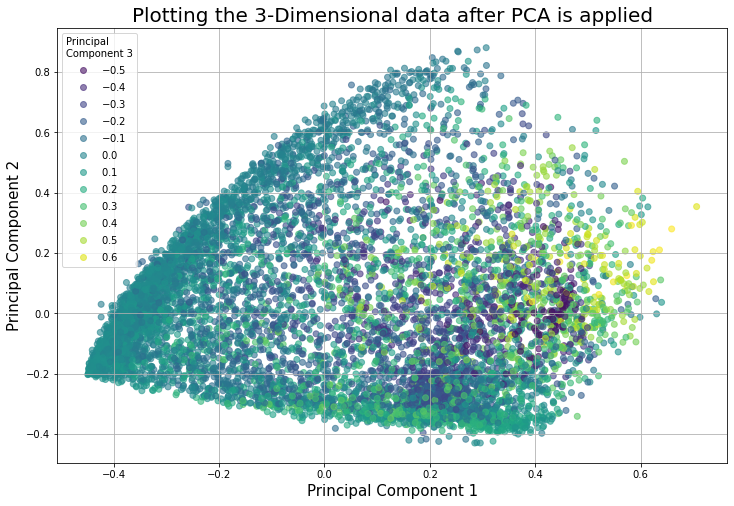

array([0.33143791, 0.2751133 , 0.16474062])

In [30]:
# Задание 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

path ='../ExternalFiles/csv/CC GENERAL.csv'
df = pd.read_csv(path)

df1 = df.drop('CUST_ID', axis = 1) 
df1.fillna(method ='bfill', inplace = True) 

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df1) 

# Normalizing the Data 
normalized_df = normalize(df1) 

# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

pca = PCA(n_components = 3) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'] 
  
pcadf.head(10)

fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(pcadf['Principal Component 1'],
                     pcadf['Principal Component 2'], 
                     c = pcadf['Principal Component 3'],
                     alpha=0.6)
plt.title('Plotting the 3-Dimensional data after PCA is applied', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.legend(*scatter.legend_elements(), loc="best", title="Principal\nComponent 3")
ax.plot([])
ax.grid()
plt.show()
pca.explained_variance_ratio_